In [ ]:
#task 1:- Write a python function which take a dataframe as input and deals with the issue of outliers in all the continuous variables.
 
#Importing libraries & dataset(dataframe)
import pandas as pd
import numpy as np
df=pd.read_csv('games.csv')
df.head()                          #To take a look on the dataframe

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [ ]:
col=list(df.columns)
df.shape                       #To Check dataframe size and number of variables

(81312, 20)

In [ ]:
list(set(df.dtypes))     #To Check the type of the variables in the data

[dtype('int64'), dtype('float64'), dtype('O')]

In [ ]:
#to identify which variables are continuous            
df_Continuous = df.select_dtypes(include = ['float64', 'int64'])  

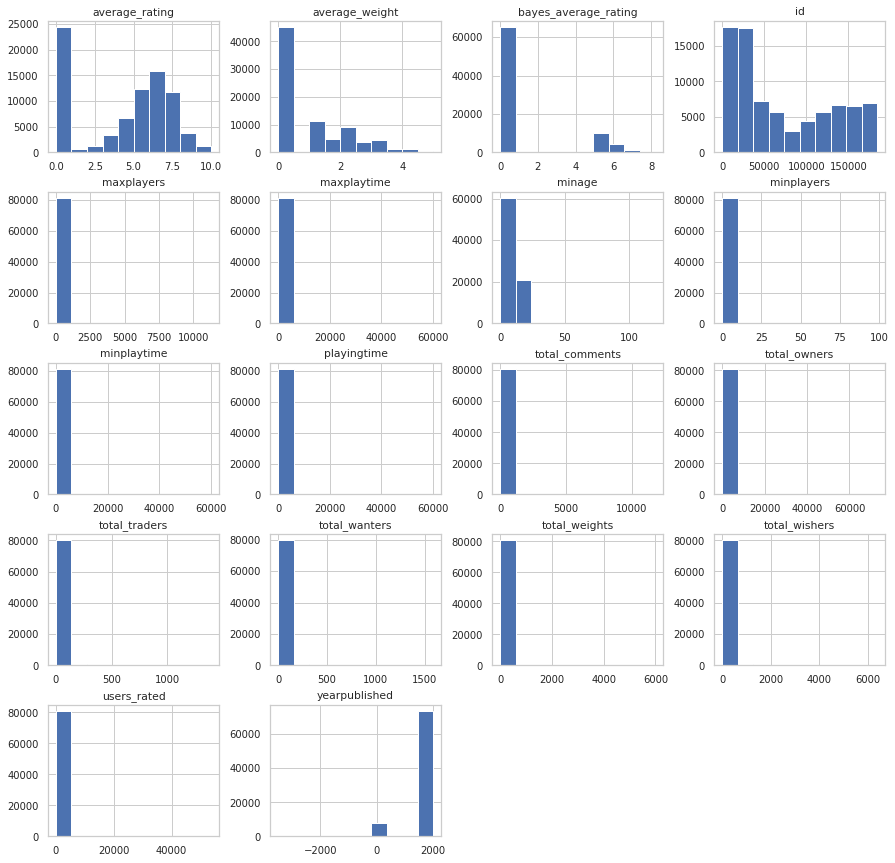

In [ ]:
#To make histograms of continuous variables to see their data distributions
df_Continuous.hist(figsize=(15,15),xlabelsize=10, ylabelsize=10);

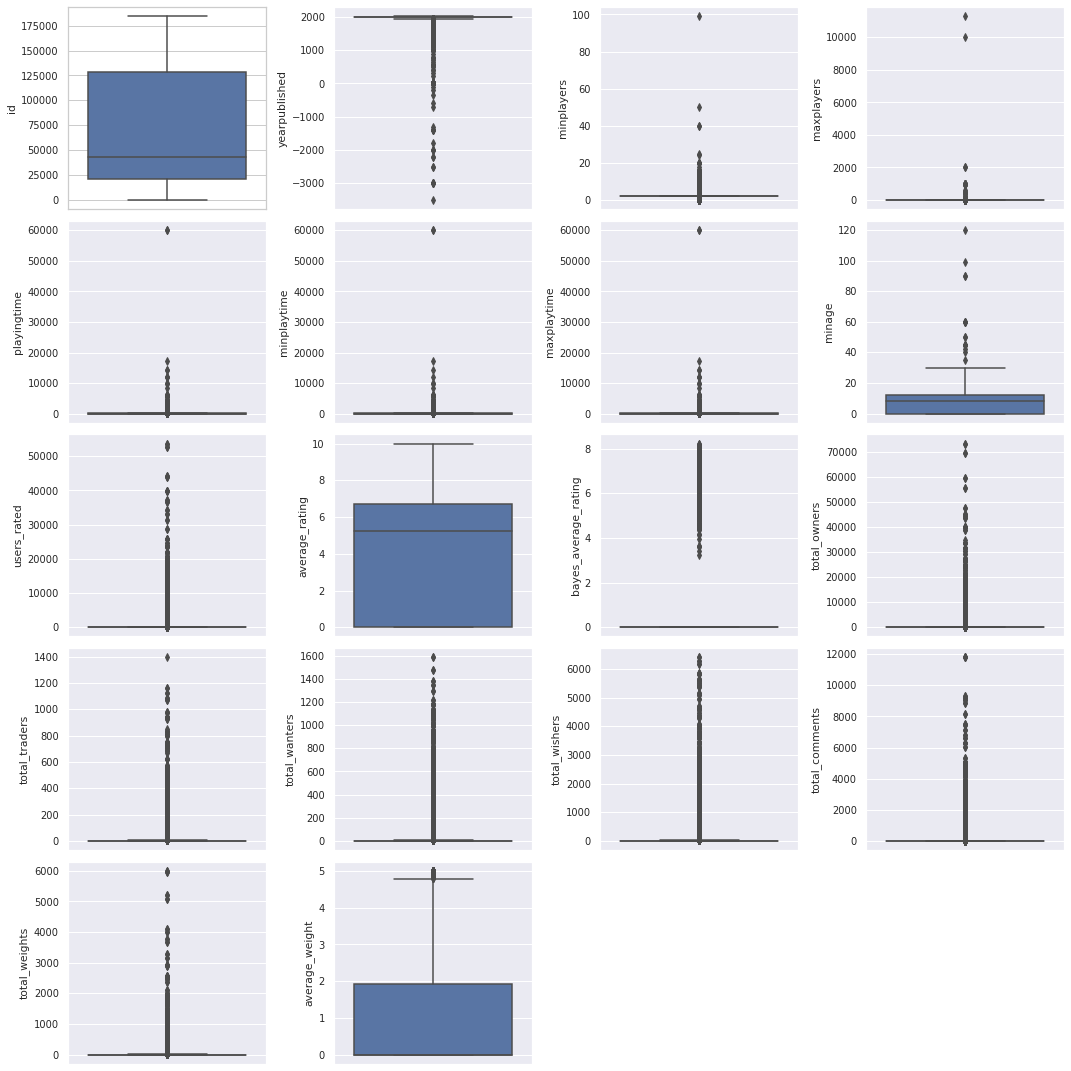

In [ ]:
#To detect the outlier in the data using the boxplot diagram

import seaborn as sns
import matplotlib.pyplot as plt
l=df_Continuous.columns
n=len(l)
number_of_figures_columnwise=4
number_of_figures_rowwise = (n-1)/number_of_figures_columnwise
plt.figure(figsize=(15,15))
for i in range(0,n):
    plt.subplot(number_of_figures_rowwise + 1,number_of_figures_columnwise,i+1)
    sns.set_style('darkgrid')
    sns.boxplot(df[l[i]],orient='v')
    plt.tight_layout()

In [ ]:
#Calculation of values of boxplots
Q1=df[col].quantile(0.25)            
Q3=df[col].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
for i in l:
  print('Q1:',Q1[(i)], 'Q3:',Q3[(i)],'IQR:',IQR[(i)],'min:',Lower_Whisker[(i)],'max:',Upper_Whisker[(i)])

Q1: 21339.75 Q3: 128836.5 IQR: 107496.75 min: -139905.375 max: 290081.625
Q1: 1984.0 Q3: 2010.0 IQR: 26.0 min: 1945.0 max: 2049.0
Q1: 2.0 Q3: 2.0 IQR: 0.0 min: 2.0 max: 2.0
Q1: 2.0 Q3: 6.0 IQR: 4.0 min: -4.0 max: 12.0
Q1: 8.0 Q3: 60.0 IQR: 52.0 min: -70.0 max: 138.0
Q1: 10.0 Q3: 60.0 IQR: 50.0 min: -65.0 max: 135.0
Q1: 8.0 Q3: 60.0 IQR: 52.0 min: -70.0 max: 138.0
Q1: 0.0 Q3: 12.0 IQR: 12.0 min: -18.0 max: 30.0
Q1: 0.0 Q3: 16.0 IQR: 16.0 min: -24.0 max: 40.0
Q1: 0.0 Q3: 6.7187775 IQR: 6.7187775 min: -10.078166249999999 max: 16.796943749999997
Q1: 0.0 Q3: 0.0 IQR: 0.0 min: 0.0 max: 0.0
Q1: 1.0 Q3: 51.0 IQR: 50.0 min: -74.0 max: 126.0
Q1: 0.0 Q3: 2.0 IQR: 2.0 min: -3.0 max: 5.0
Q1: 0.0 Q3: 3.0 IQR: 3.0 min: -4.5 max: 7.5
Q1: 0.0 Q3: 7.0 IQR: 7.0 min: -10.5 max: 17.5
Q1: 0.0 Q3: 9.0 IQR: 9.0 min: -13.5 max: 22.5
Q1: 0.0 Q3: 2.0 IQR: 2.0 min: -3.0 max: 5.0
Q1: 0.0 Q3: 1.9167 IQR: 1.9167 min: -2.87505 max: 4.79175


In [ ]:
#remove the outliers from the dataset.
new_df = df[~((df < (Lower_Whisker)) |(df > (Upper_Whisker))).any(axis=1)]  
new_df.shape        #dataset after all outliers are removed.

(36100, 20)

In [ ]:
#Write a function in python that take dataframe as input and drop columns having Pearson correlation more than 0.85
df=new_df          #let us take the dataset which has been cleaned by removing outliers
corr_matrix = df.corr().abs()      #correlation matrix
corr_matrix

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,1.000000,0.446930,NaN,0.007266,0.019918,0.014509,0.019918,0.198271,0.187970,0.085788,NaN,0.117639,0.228642,0.102252,0.010517,0.254931,0.139045,0.101403
yearpublished,0.446930,1.000000,NaN,0.018584,0.089156,0.072480,0.089156,0.221072,0.056427,0.124683,NaN,0.060477,0.066703,0.011224,0.140344,0.000097,0.063280,0.083873
minplayers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxplayers,0.007266,0.018584,NaN,1.000000,0.160751,0.157459,0.160751,0.103801,0.035004,0.012998,NaN,0.012892,0.032289,0.052209,0.041302,0.021067,0.019548,0.061602
playingtime,0.019918,0.089156,NaN,0.160751,1.000000,0.975255,1.000000,0.278606,0.098690,0.131342,NaN,0.127977,0.066331,0.138507,0.130711,0.072779,0.069871,0.142563
minplaytime,0.014509,0.072480,NaN,0.157459,0.975255,1.000000,0.975255,0.270759,0.106358,0.137532,NaN,0.136807,0.074786,0.145134,0.127893,0.078148,0.070847,0.144562
maxplaytime,0.019918,0.089156,NaN,0.160751,1.000000,0.975255,1.000000,0.278606,0.098690,0.131342,NaN,0.127977,0.066331,0.138507,0.130711,0.072779,0.069871,0.142563
minage,0.198271,0.221072,NaN,0.103801,0.278606,0.270759,0.278606,1.000000,0.113469,0.126616,NaN,0.143331,0.103921,0.115391,0.147604,0.086351,0.078403,0.111042
users_rated,0.187970,0.056427,NaN,0.035004,0.098690,0.106358,0.098690,0.113469,1.000000,0.470862,NaN,0.778962,0.532511,0.373757,0.440330,0.800974,0.641663,0.460961
average_rating,0.085788,0.124683,NaN,0.012998,0.131342,0.137532,0.131342,0.126616,0.470862,1.000000,NaN,0.430024,0.253379,0.290390,0.353746,0.403202,0.381569,0.424988


In [ ]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
id,NaN,0.44693,NaN,0.007266,0.019918,0.014509,0.019918,0.198271,0.187970,0.085788,NaN,0.117639,0.228642,0.102252,0.010517,0.254931,0.139045,0.101403
yearpublished,NaN,NaN,NaN,0.018584,0.089156,0.072480,0.089156,0.221072,0.056427,0.124683,NaN,0.060477,0.066703,0.011224,0.140344,0.000097,0.063280,0.083873
minplayers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxplayers,NaN,NaN,NaN,NaN,0.160751,0.157459,0.160751,0.103801,0.035004,0.012998,NaN,0.012892,0.032289,0.052209,0.041302,0.021067,0.019548,0.061602
playingtime,NaN,NaN,NaN,NaN,NaN,0.975255,1.000000,0.278606,0.098690,0.131342,NaN,0.127977,0.066331,0.138507,0.130711,0.072779,0.069871,0.142563
minplaytime,NaN,NaN,NaN,NaN,NaN,NaN,0.975255,0.270759,0.106358,0.137532,NaN,0.136807,0.074786,0.145134,0.127893,0.078148,0.070847,0.144562
maxplaytime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.278606,0.098690,0.131342,NaN,0.127977,0.066331,0.138507,0.130711,0.072779,0.069871,0.142563
minage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.113469,0.126616,NaN,0.143331,0.103921,0.115391,0.147604,0.086351,0.078403,0.111042
users_rated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470862,NaN,0.778962,0.532511,0.373757,0.440330,0.800974,0.641663,0.460961
average_rating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.430024,0.253379,0.290390,0.353746,0.403202,0.381569,0.424988


In [ ]:
# Find variables with correlation greater than 0.85
to_drop_variables = [column for column in upper.columns if any(upper[column] > 0.85)]
to_drop_variables

['minplaytime', 'maxplaytime']

In [ ]:
# Drop variables 
df.drop(df[to_drop_variables], axis=1)

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13037,65,boardgame,The Garden Game,1996.0,2.0,6.0,30.0,8.0,16,3.93750,0.0,27,2,1,2,12,1,2.00
13042,123,boardgame,Green Thumb Cards,1996.0,2.0,5.0,45.0,7.0,17,6.55882,0.0,32,2,1,3,9,4,1.25
13043,143,boardgame,Wortelboer,1999.0,2.0,4.0,30.0,0.0,17,4.11765,0.0,35,3,1,0,13,0,0.00
13046,203,boardgame,Skworms,1997.0,2.0,4.0,30.0,6.0,5,3.60000,0.0,13,0,0,1,5,0,0.00
13057,498,boardgame,Sufferin' Spirits,1987.0,2.0,4.0,120.0,0.0,17,5.97059,0.0,46,0,1,2,10,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81302,184399,boardgame,Micropolis,2014.0,2.0,4.0,60.0,12.0,0,0.00000,0.0,0,0,0,1,0,0,0.00
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,18.0,0,0.00000,0.0,0,0,0,0,0,0,0.00
81306,184440,boardgame,Stick and Stones,2015.0,2.0,2.0,120.0,0.0,0,0.00000,0.0,0,0,0,0,0,0,0.00
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,12.0,0,0.00000,0.0,0,0,0,0,0,0,0.00


Text(0.5, 1.0, 'Correlation matrix')

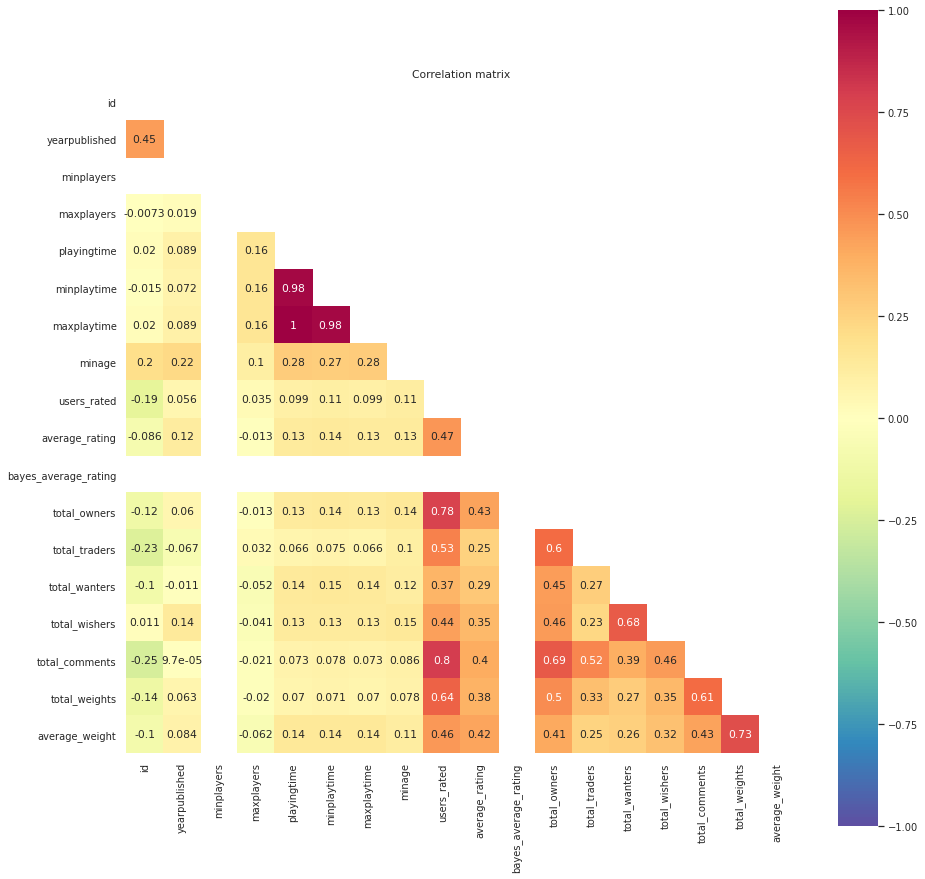

In [ ]:
#2nd method (using heatmap)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.set(style='whitegrid', font_scale=0.9)
corrs = df.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-1, vmax=1,annot=True)
plt.title('Correlation matrix')

In [ ]:
#Correlation matrix. Warm colors (red) indicate a positive correlation
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
print(); print(upper)
 # Find index of feature columns with correlation greater than 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(); print(to_drop)
# Drop Marked Features
df1 = df.drop(df[to_drop], axis=1)
df1       #final data 


                      id  yearpublished  ...  total_weights  average_weight
id                   NaN        0.44693  ...       0.139045        0.101403
yearpublished        NaN            NaN  ...       0.063280        0.083873
minplayers           NaN            NaN  ...            NaN             NaN
maxplayers           NaN            NaN  ...       0.019548        0.061602
playingtime          NaN            NaN  ...       0.069871        0.142563
minplaytime          NaN            NaN  ...       0.070847        0.144562
maxplaytime          NaN            NaN  ...       0.069871        0.142563
minage               NaN            NaN  ...       0.078403        0.111042
users_rated          NaN            NaN  ...       0.641663        0.460961
average_rating       NaN            NaN  ...       0.381569        0.424988
bayes_average_rating NaN            NaN  ...            NaN             NaN
total_owners         NaN            NaN  ...       0.500967        0.410180
total_trade

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
13037,65,boardgame,The Garden Game,1996.0,2.0,6.0,30.0,8.0,16,3.93750,0.0,27,2,1,2,12,1,2.00
13042,123,boardgame,Green Thumb Cards,1996.0,2.0,5.0,45.0,7.0,17,6.55882,0.0,32,2,1,3,9,4,1.25
13043,143,boardgame,Wortelboer,1999.0,2.0,4.0,30.0,0.0,17,4.11765,0.0,35,3,1,0,13,0,0.00
13046,203,boardgame,Skworms,1997.0,2.0,4.0,30.0,6.0,5,3.60000,0.0,13,0,0,1,5,0,0.00
13057,498,boardgame,Sufferin' Spirits,1987.0,2.0,4.0,120.0,0.0,17,5.97059,0.0,46,0,1,2,10,1,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81302,184399,boardgame,Micropolis,2014.0,2.0,4.0,60.0,12.0,0,0.00000,0.0,0,0,0,1,0,0,0.00
81303,184403,boardgame,Big Dope Deal,2008.0,2.0,6.0,0.0,18.0,0,0.00000,0.0,0,0,0,0,0,0,0.00
81306,184440,boardgame,Stick and Stones,2015.0,2.0,2.0,120.0,0.0,0,0.00000,0.0,0,0,0,0,0,0,0.00
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,12.0,0,0.00000,0.0,0,0,0,0,0,0,0.00
